In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from warnings import filterwarnings

# Model & Tahmin

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)
#x = df["Pregnancies"]
x = pd.DataFrame(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size= 0.30,
                                                   random_state= 42)

In [3]:
rf_model = RandomForestClassifier().fit(x_train,y_train)

In [4]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_pred,y_test)

0.7359307359307359

# Model Tuning

In [5]:
?rf_model

In [7]:
rf_params = {"max_depth": [2,5,8,10],
             "max_features": [2,5,8],
             "n_estimators": [10,500,1000],
             "min_samples_split": [2,5,10]}

In [8]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model,
                          rf_params,
                          cv= 10,
                          n_jobs= -1,
                          verbose= 2)

In [9]:
rf_cv_model_train = rf_cv_model.fit(x_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [10]:
print("En İyi Parametreler: " + str(rf_cv_model_train.best_params_))

En İyi Parametreler: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 1000}


In [11]:
rf_tuned = RandomForestClassifier(max_depth=10,
                                 max_features= 5,
                                 min_samples_split=10,
                                 n_estimators = 1000)
rf_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=10,
                       n_estimators=1000)

In [12]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_pred,y_test)

0.7489177489177489

In [13]:
importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index= x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

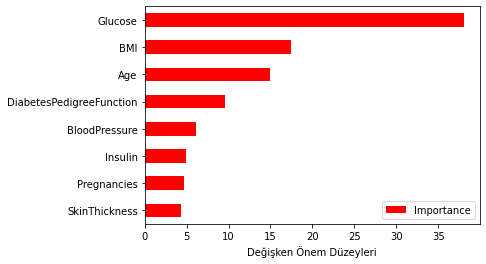

In [14]:
importance.sort_values(by = "Importance",
                      axis= 0,
                      ascending= True).plot(kind="barh",color = "r")
plt.xlabel("Değişken Önem Düzeyleri")